# Image Preprocessing

## Grey Scale and Resize Training Images

In [ ]:
import os
os.chdir('training_data/hem') # I did this to all 4 folders (training: hem&all, validation, and testing )

from PIL import Image
import numpy as np

try:
    os.remove('.DS_Store')
except FileNotFoundError:
    pass

l = os.listdir()
hem = np.zeros((len(l), 45*45))
hem_y = []

for idx, i in enumerate(l):
    if i == '.DS_Store': 
        continue 
    else: 
        im = Image.open(i)
        im = im.convert('L')
        im = im.resize((45,45))
        im.save(i)

        x = np.asarray(im)
        hem[idx] = x.flatten()
        hem_y.append(0)

In [ ]:
hem.shape

In [ ]:
import os
os.chdir('training_data/all') # I did this to all 4 folders (training: all&all, validation, and testing )

from PIL import Image
import numpy as np

try:
    os.remove('.DS_Store')
except FileNotFoundError:
    pass

l = os.listdir()
all = np.zeros((len(l), 45*45))
all_y = []

for idx, i in enumerate(l):
    if i == '.DS_Store': 
        continue 
    else: 
        im = Image.open(i)
        im = im.convert('L')
        im = im.resize((45,45))
        im.save(i)

        x = np.asarray(im)
        all[idx] = x.flatten()
        all_y.append(1)

In [ ]:
all.shape

In [ ]:
all_y = np.array(all_y)
hem_y = np.array(hem_y)
X_1 = np.column_stack((all, all_y))
X_2 = np.column_stack((hem, hem_y))
X_1.shape, X_2.shape

In [ ]:
X = np.row_stack((X_1, X_2))
X.shape

In [ ]:
import os
os.chdir('/Users/ahmed/Downloads/CNMC_Leukemia_45x45')

np.savetxt('training_45x45.csv', X, delimiter=',')

## Grey Scale and Resize Validation Images

In [ ]:
import os
os.chdir('/Users/ahmed/Downloads/CNMC_Leukemia_45x45/validation_data') # I did this to all 4 folders (training: hem&all, validation, and testing )


from PIL import Image
import numpy as np
import pandas as pd

try:
    os.remove('.DS_Store')
except FileNotFoundError:
    pass

key = pd.read_csv('/Users/ahmed/Downloads/CNMC_Leukemia_45x45/C-NMC_test_prelim_phase_data_labels.csv')
val = np.zeros((len(key), 45*45))
val_y = []

for idx, row in key.iterrows():
    im = Image.open(row[1])
    im = im.convert('L')
    im = im.resize((45,45))
    im.save(row[1])

    x = np.asarray(im)
    val[idx] = x.flatten()
    val_y.append(row[2])

In [ ]:
val_y = np.array(val_y)
val = np.column_stack((val, val_y))

In [ ]:
os.chdir('/Users/ahmed/Downloads/CNMC_Leukemia_45x45')

np.savetxt('validation_45x45.csv', val, delimiter=',')

val.shape

# Load the data

In [1]:
import pandas as pd
import numpy as np
data_tr = pd.read_csv('training_45x45.csv', header=None)
data_vl = pd.read_csv('validation_45x45.csv', header=None)
data = data_tr.append(data_vl, ignore_index=True)
print(len(data_tr)+len(data_vl))
data

12528


,0,1,2,3,4,5,6,7,8,9,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [2]:
# import random
# class_0 = len(data[data.iloc[:,-1]==0])
# class_1 = len(data[data.iloc[:,-1]==1])
# filter = np.random.randint(0, class_1, class_0)
# new_data = np.concatenate((np.asarray(data)[filter], np.asarray(data.iloc[class_1:,])))
# new_data.shape

In [3]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

data = shuffle(data, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:,:-1])
X.shape

(12528, 2025)

In [4]:
# y = new_data[:,-1]
y = data.iloc[:,-1]
y

7488     0.0
3776     1.0
6243     1.0
6123     1.0
4714     1.0
        ... 
11964    1.0
5191     1.0
5390     1.0
860      1.0
7270     1.0
Name: 2025, Length: 12528, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
np.unique(y, return_counts=True)

(array([0., 1.]), array([4037, 8491]))

# Logisitic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate

log_reg = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_log = cross_validate(log_reg, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [8]:
print(f"Accuracy: {np.round(scores_log['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_log['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_log['test_recall'], 4)}. Average is {np.round(np.mean(scores_log['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_log['test_precision'], 4)}. Average is {np.round(np.mean(scores_log['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_log['test_f1'], 4)}. Average is {np.round(np.mean(scores_log['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_log['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_log['test_roc_auc'])*100, 2)}%")

Accuracy: [0.7787 0.7478 0.7605 0.7764 0.7595 0.7675 0.7605 0.7565 0.7595 0.7675]. Average is 76.34%
Recall: [0.8719 0.8513 0.8601 0.8719 0.8601 0.8527 0.8586 0.8439 0.8557 0.8687]. Average is 85.95%
Precision: [0.8143 0.7918 0.8011 0.8121 0.8    0.8132 0.8019 0.8059 0.8025 0.8035]. Average is 80.46%
F1 Score: [0.8421 0.8204 0.8295 0.8409 0.829  0.8325 0.8293 0.8245 0.8282 0.8349]. Average is 83.11%
ROC AUC: [0.779  0.7658 0.7642 0.7682 0.7546 0.7692 0.7589 0.7472 0.7425 0.7707]. Average is 76.2%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 461,  343],
       [ 240, 1462]])

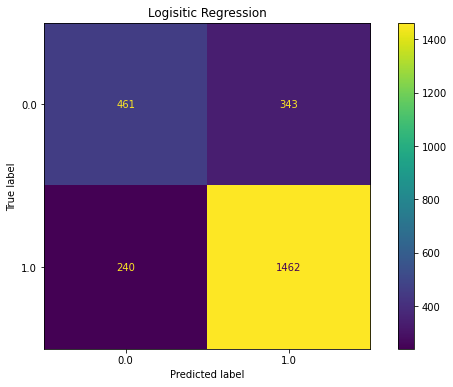

In [9]:
from sklearn import metrics
import matplotlib.pyplot as plt
log_reg.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Logisitic Regression')

disp = metrics.plot_confusion_matrix(log_reg, X_test, y_test, ax=ax)
disp.confusion_matrix

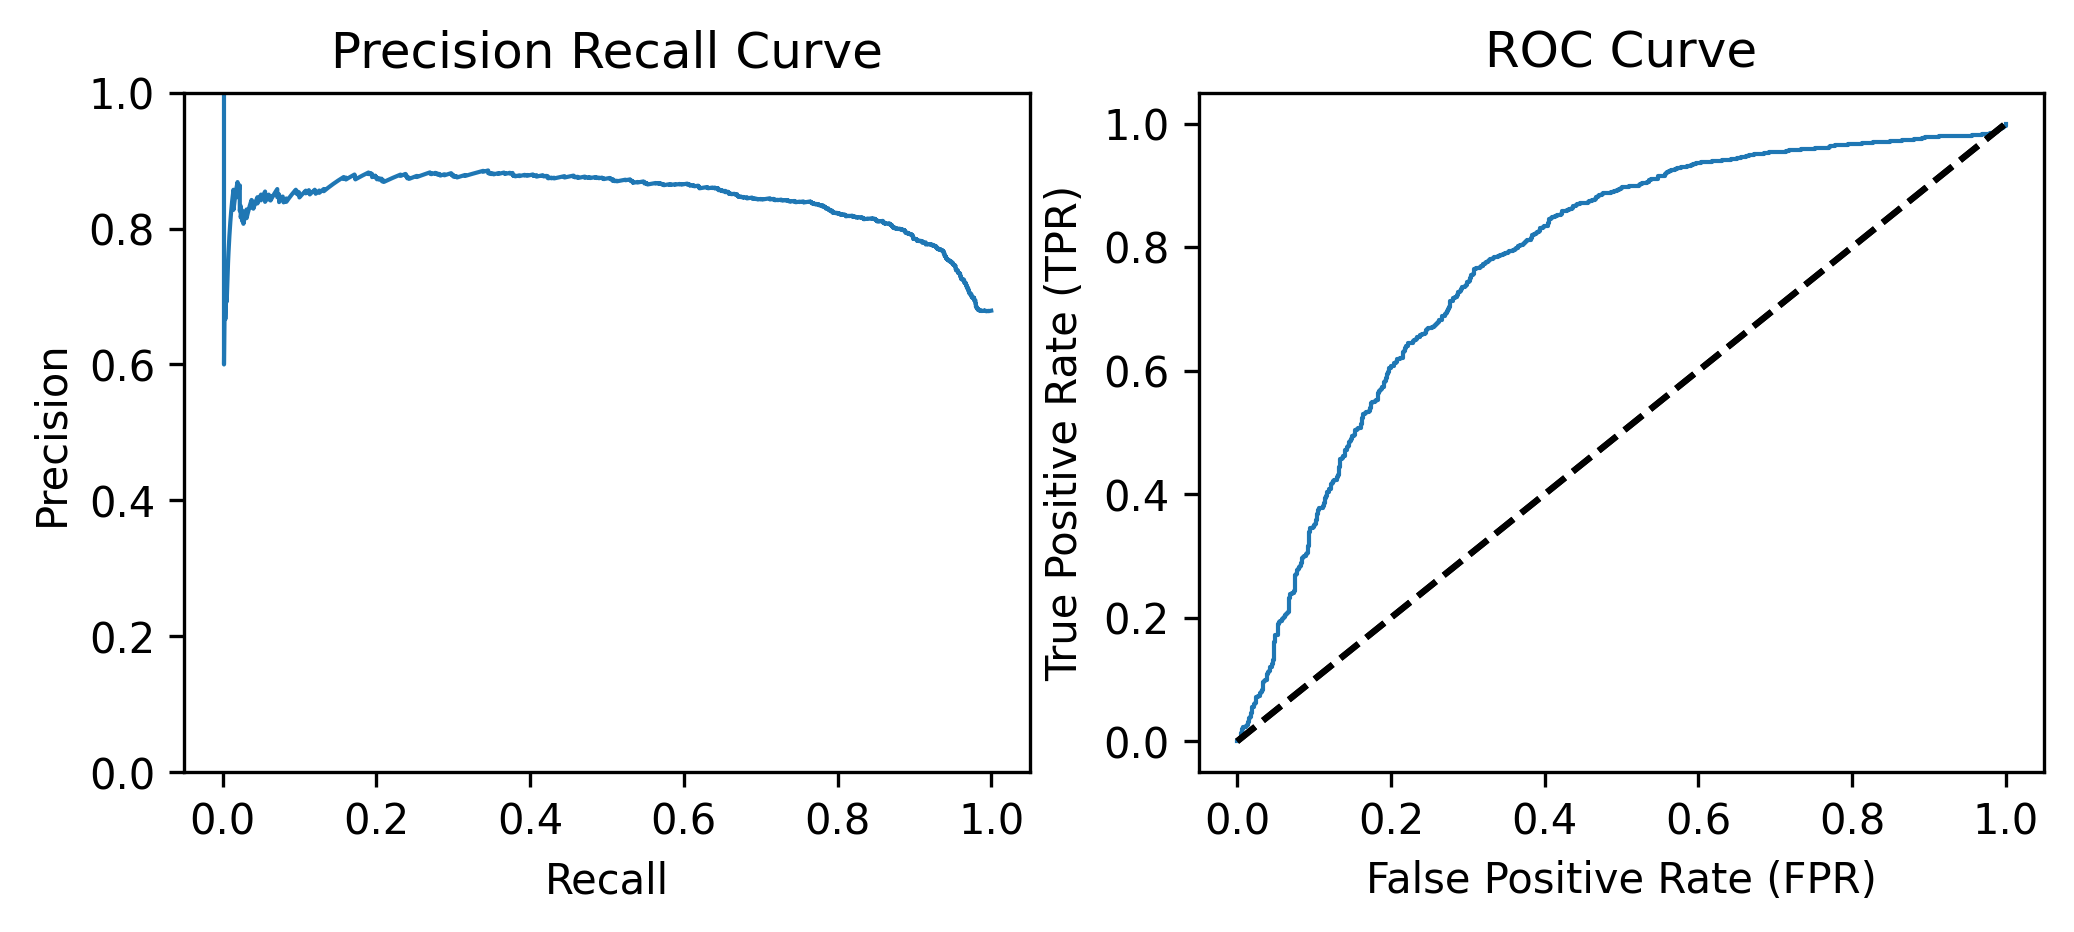

In [10]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = log_reg.predict_proba(X_test)[:,1]
precision_log, recall_log, _ = precision_recall_curve(y_test, soft_pred)
fpr_log, tpr_log, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_log, precision_log, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_log, tpr_log, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# SVM (RBF)

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

rbf = SVC(kernel='rbf')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_rbf = cross_validate(rbf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [12]:
print(f"Accuracy: {np.round(scores_rbf['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_rbf['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_rbf['test_recall'], 4)}. Average is {np.round(np.mean(scores_rbf['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_rbf['test_precision'], 4)}. Average is {np.round(np.mean(scores_rbf['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_rbf['test_f1'], 4)}. Average is {np.round(np.mean(scores_rbf['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_rbf['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_rbf['test_roc_auc'])*100, 2)}%")

Accuracy: [0.8106 0.7836 0.7874 0.7904 0.7814 0.7934 0.7934 0.7874 0.7934 0.7994]. Average is 79.21%
Recall: [0.9396 0.9337 0.9175 0.9219 0.9205 0.9337 0.9426 0.9116 0.9293 0.9366]. Average is 92.87%
Precision: [0.8107 0.7866 0.7987 0.7995 0.7911 0.7965 0.7921 0.8018 0.7987 0.8008]. Average is 79.76%
F1 Score: [0.8704 0.8539 0.854  0.8564 0.8509 0.8597 0.8608 0.8532 0.8591 0.8634]. Average is 85.82%
ROC AUC: [0.8148 0.8153 0.8036 0.7796 0.8029 0.831  0.8108 0.7888 0.7875 0.8282]. Average is 80.63%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 413,  391],
       [ 114, 1588]])

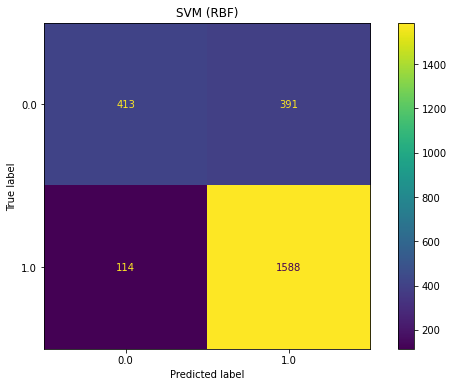

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

rbf = SVC(kernel='rbf', probability=True)
rbf.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('SVM (RBF)')

disp = metrics.plot_confusion_matrix(rbf, X_test, y_test, ax=ax)
disp.confusion_matrix

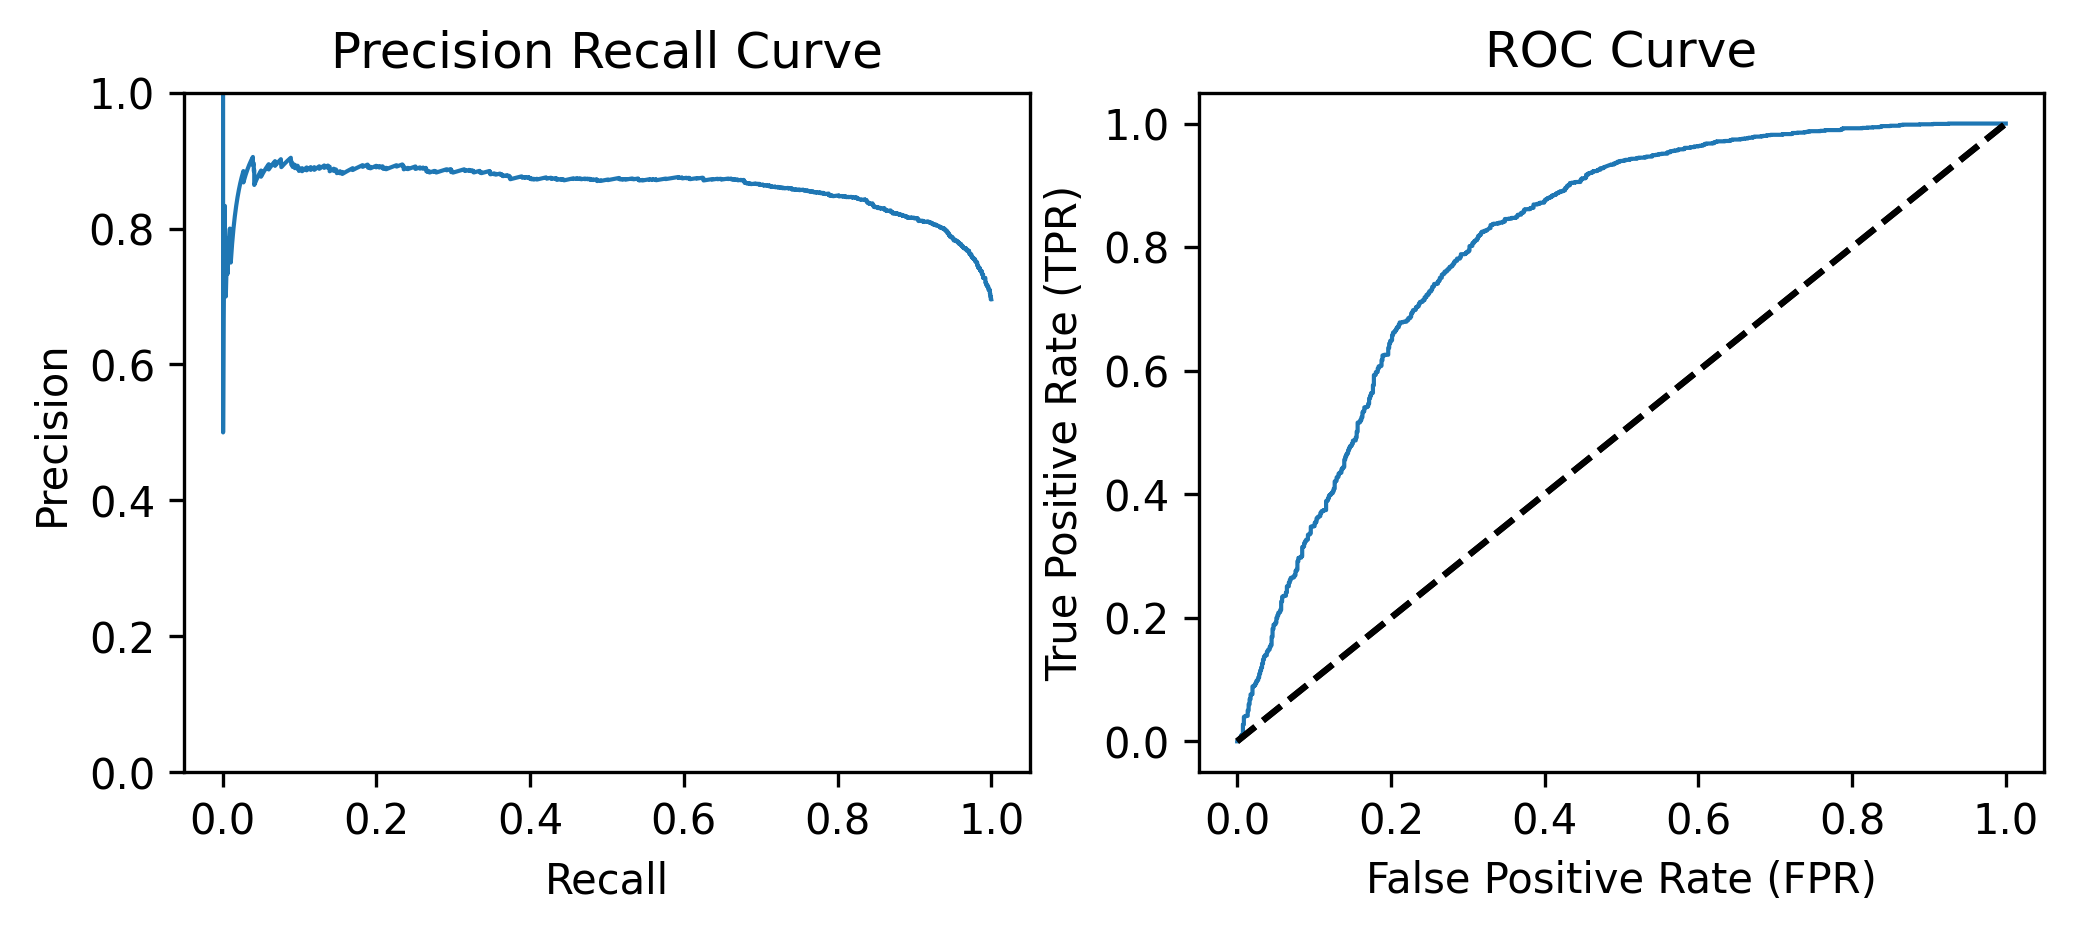

In [14]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = rbf.predict_proba(X_test)[:,1]
precision_rbf, recall_rbf, _ = precision_recall_curve(y_test, soft_pred)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_rbf, precision_rbf, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_rbf, tpr_rbf, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# SVM (Poly)

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

poly = SVC(kernel='poly', degree=2)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_poly = cross_validate(poly, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [16]:
print(f"Accuracy: {np.round(scores_poly['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_poly['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_poly['test_recall'], 4)}. Average is {np.round(np.mean(scores_poly['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_poly['test_precision'], 4)}. Average is {np.round(np.mean(scores_poly['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_poly['test_f1'], 4)}. Average is {np.round(np.mean(scores_poly['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_poly['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_poly['test_roc_auc'])*100, 2)}%")

Accuracy: [0.7817 0.7747 0.7824 0.7764 0.7675 0.7864 0.7715 0.7555 0.7735 0.7784]. Average is 77.48%
Recall: [0.9367 0.944  0.9411 0.9455 0.9381 0.9529 0.9529 0.9264 0.9323 0.9513]. Average is 94.21%
Precision: [0.7833 0.7732 0.7821 0.7744 0.7693 0.7805 0.7666 0.7633 0.7776 0.7734]. Average is 77.44%
F1 Score: [0.8531 0.8501 0.8543 0.8515 0.8454 0.8581 0.8496 0.837  0.848  0.8532]. Average is 85.0%
ROC AUC: [0.7867 0.7745 0.7679 0.7623 0.7839 0.8051 0.785  0.7718 0.7565 0.7991]. Average is 77.93%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 271,  533],
       [  52, 1650]])

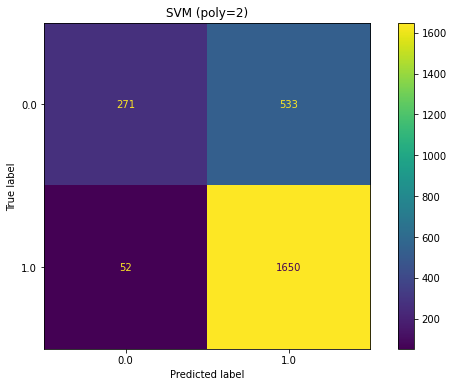

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

poly = SVC(kernel='poly', probability=True)
poly.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('SVM (poly=2)')

disp = metrics.plot_confusion_matrix(poly, X_test, y_test, ax=ax)
disp.confusion_matrix

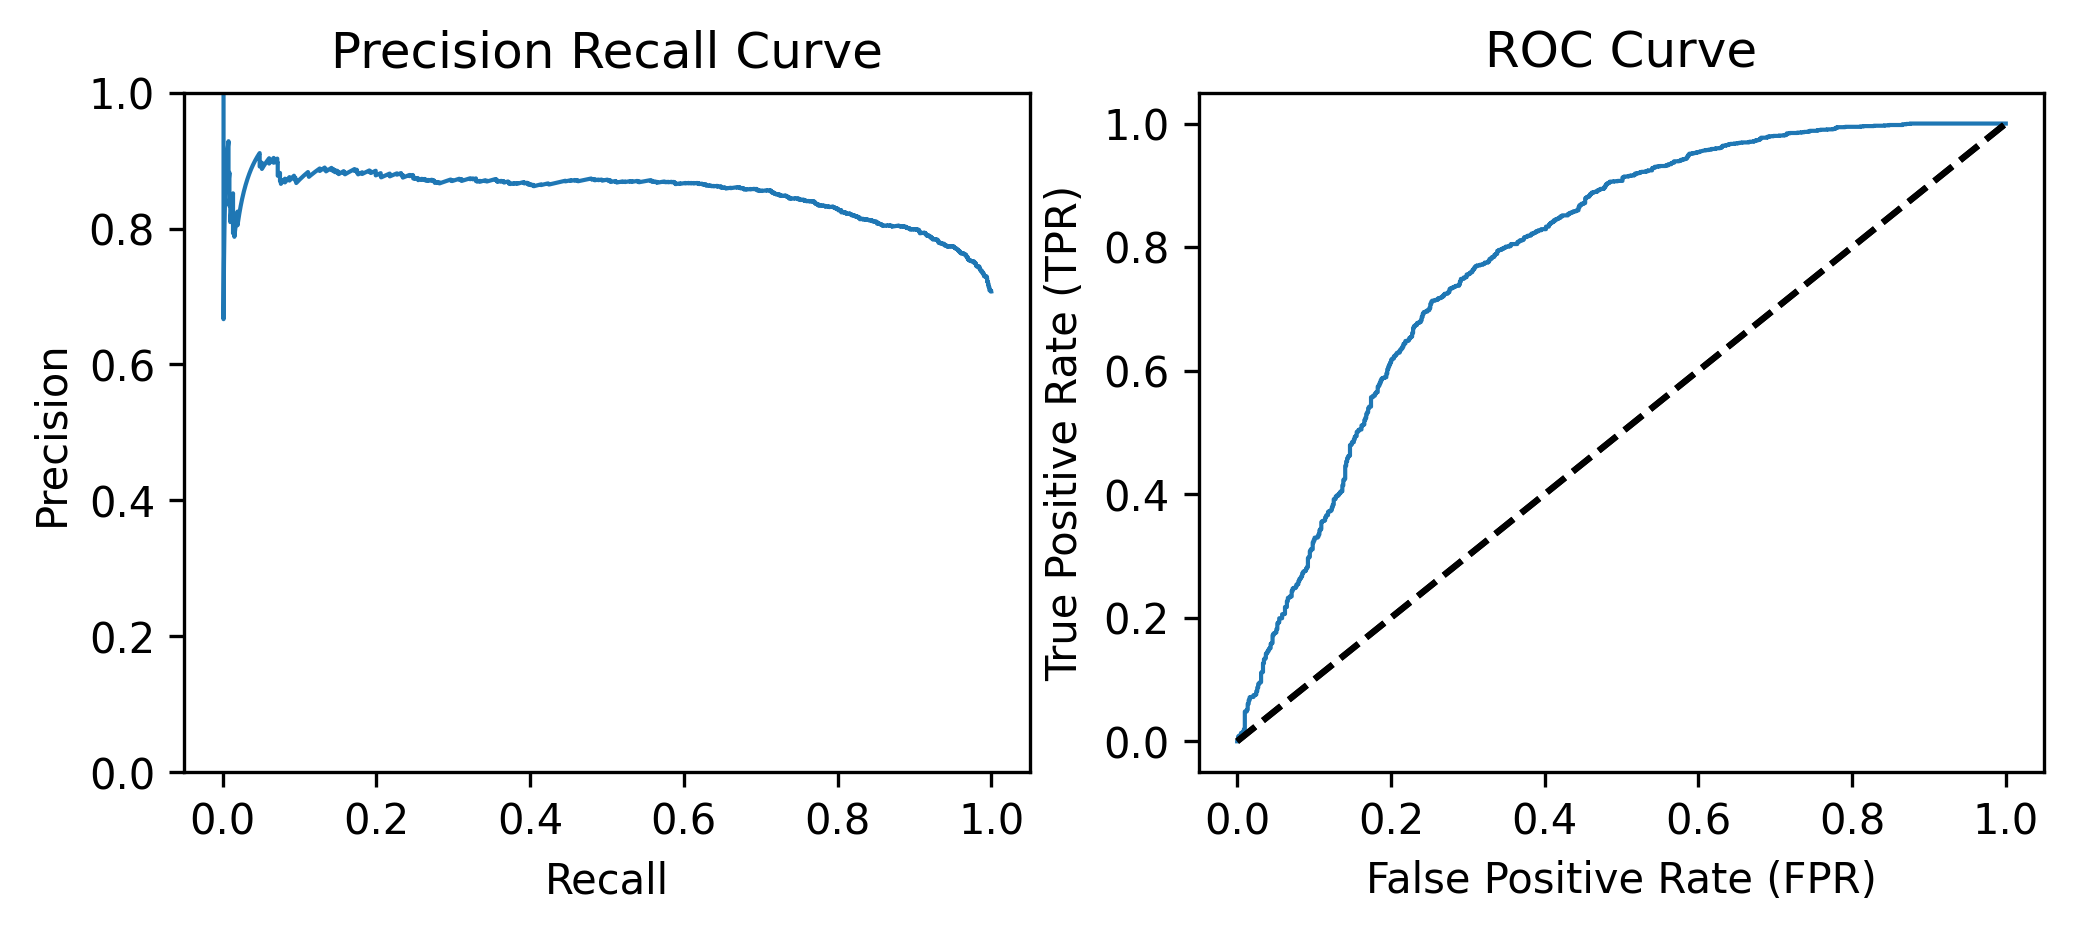

In [18]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = poly.predict_proba(X_test)[:,1]
precision_poly, recall_poly, _ = precision_recall_curve(y_test, soft_pred)
fpr_poly, tpr_poly, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_poly, precision_poly, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_poly, tpr_poly, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

tree = DecisionTreeClassifier(max_depth=4)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_tree = cross_validate(tree, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [20]:
print(f"Accuracy: {np.round(scores_tree['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_tree['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_tree['test_recall'], 4)}. Average is {np.round(np.mean(scores_tree['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_tree['test_precision'], 4)}. Average is {np.round(np.mean(scores_tree['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_tree['test_f1'], 4)}. Average is {np.round(np.mean(scores_tree['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_tree['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_tree['test_roc_auc'])*100, 2)}%")

Accuracy: [0.7896 0.7797 0.7725 0.7615 0.7665 0.7794 0.7715 0.7774 0.7954 0.8014]. Average is 77.95%
Recall: [0.9116 0.9057 0.8954 0.894  0.8837 0.9308 0.9175 0.8999 0.919  0.9145]. Average is 90.72%
Precision: [0.8039 0.7966 0.7948 0.7842 0.7947 0.7841 0.7827 0.7977 0.8062 0.8147]. Average is 79.6%
F1 Score: [0.8544 0.8477 0.8421 0.8355 0.8368 0.8512 0.8447 0.8457 0.8589 0.8617]. Average is 84.79%
ROC AUC: [0.7919 0.7993 0.776  0.7601 0.7843 0.8018 0.7762 0.7718 0.7825 0.7994]. Average is 78.43%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 423,  381],
       [ 153, 1549]])

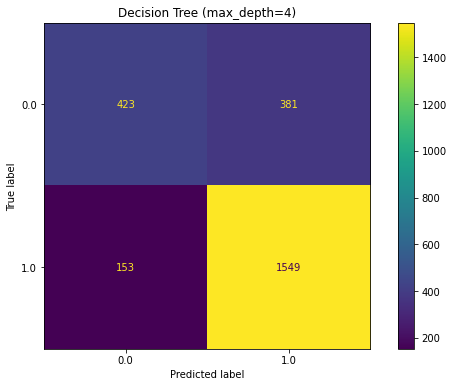

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate

# tree = SVC(kernel='tree', probability=True)
tree.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Decision Tree (max_depth=4)')

disp = metrics.plot_confusion_matrix(tree, X_test, y_test, ax=ax)
disp.confusion_matrix

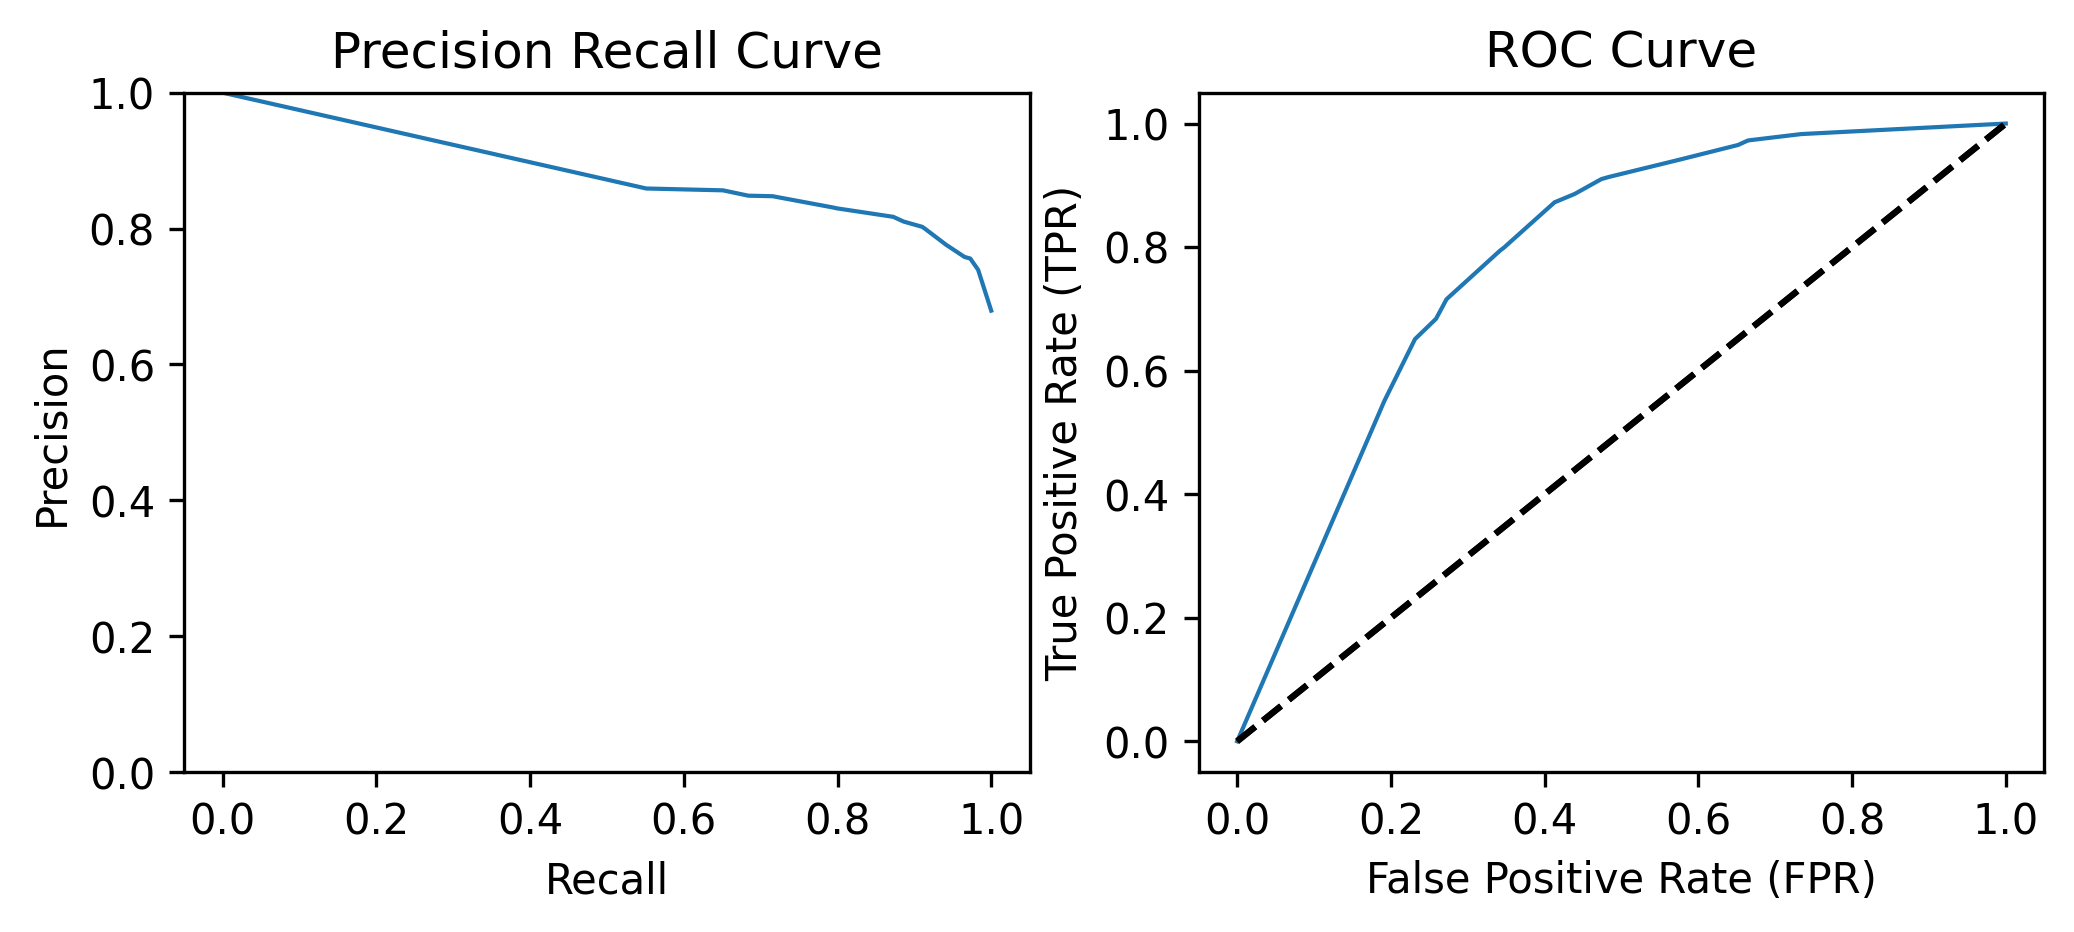

In [22]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = tree.predict_proba(X_test)[:,1]
precision_tree, recall_tree, _ = precision_recall_curve(y_test, soft_pred)
fpr_tree, tpr_tree, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_tree, precision_tree, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_tree, tpr_tree, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Random Forests

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

forest = RandomForestClassifier(n_estimators=1000, max_depth=25, n_jobs=-1)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_forest = cross_validate(forest, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

In [24]:
print(f"Accuracy: {np.round(scores_forest['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_forest['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_forest['test_recall'], 4)}. Average is {np.round(np.mean(scores_forest['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_forest['test_precision'], 4)}. Average is {np.round(np.mean(scores_forest['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_forest['test_f1'], 4)}. Average is {np.round(np.mean(scores_forest['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_forest['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_forest['test_roc_auc'])*100, 2)}%")

Accuracy: [0.8475 0.8255 0.8253 0.8194 0.8263 0.8263 0.8164 0.8084 0.8164 0.8393]. Average is 82.51%
Recall: [0.9426 0.9367 0.9293 0.9146 0.9205 0.9264 0.9396 0.9043 0.9323 0.944 ]. Average is 92.9%
Precision: [0.8488 0.8281 0.8325 0.8347 0.8389 0.8353 0.8169 0.8286 0.821  0.8388]. Average is 83.24%
F1 Score: [0.8932 0.8791 0.8782 0.8728 0.8778 0.8785 0.874  0.8648 0.8731 0.8883]. Average is 87.8%
ROC AUC: [0.8831 0.8589 0.8577 0.8475 0.8661 0.8799 0.8663 0.8355 0.8395 0.873 ]. Average is 86.07%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[ 500,  304],
       [ 109, 1593]])

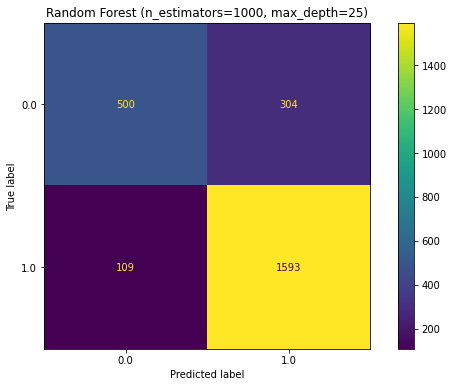

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC

forest = RandomForestClassifier(n_estimators=1000, max_depth=25, n_jobs=-1)
forest.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Random Forest (n_estimators=1000, max_depth=25)')

disp = metrics.plot_confusion_matrix(forest, X_test, y_test, ax=ax)
disp.confusion_matrix

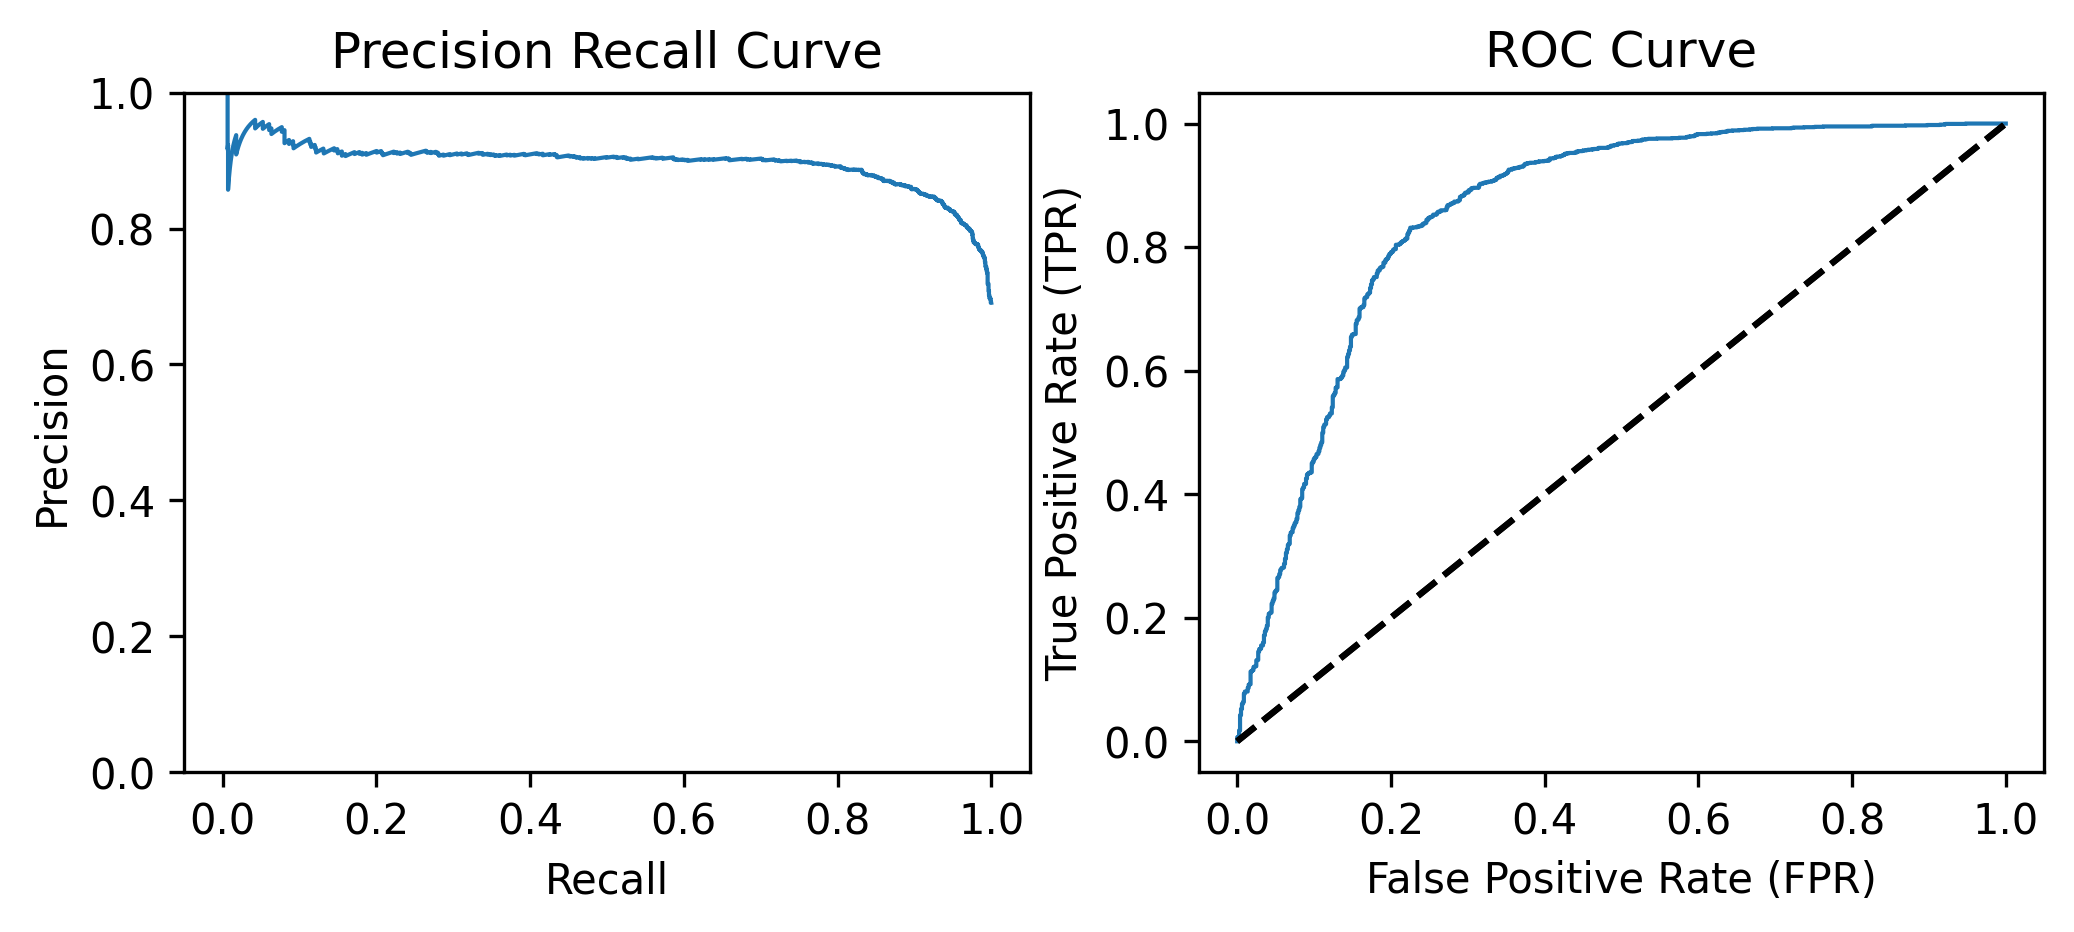

In [26]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = forest.predict_proba(X_test)[:,1]
precision_forest, recall_forest, _ = precision_recall_curve(y_test, soft_pred)
fpr_forest, tpr_forest, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_forest, precision_forest, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_forest, tpr_forest, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Neural Networks

In [27]:
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold, cross_validate
from scikeras.wrappers import KerasClassifier

nn = keras.models.Sequential([
    keras.layers.Dense(1000, activation="elu", kernel_initializer='he_normal', input_shape=X_train[0].shape),
    keras.layers.Dense(1000, activation="elu", kernel_initializer='he_normal'),
    keras.layers.Dense(1, activation="sigmoid")
])
nn.summary()
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
nn_clf = KerasClassifier(nn, epochs=15)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_nn_clf = cross_validate(nn_clf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              2026000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 3,028,001
Trainable params: 3,028,001
Non-trainable params: 0
_________________________________________________________________


2022-05-19 17:35:33.112198: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-19 17:35:33.400877: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram:///var/folders/bt/bb6h7f3s12d32pgb54_pbjph0000gn/T/tmppy17onj7/assets
Epoch 1/15
282/282 [==============================] - 3s 9ms/step - loss: 1.0632 - accuracy: 0.7470
Epoch 2/15
282/282 [==============================] - 3s 9ms/step - loss: 0.4931 - accuracy: 0.7901
Epoch 3/15
282/282 [==============================] - 3s 9ms/step - loss: 0.4537 - accuracy: 0.8065
Epoch 4/15
282/282 [==============================] - 3s 9ms/step - loss: 0.4124 - accuracy: 0.8205
Epoch 5/15
282/282 [==============================] - 3s 9ms/step - loss: 0.3932 - accuracy: 0.8268
Epoch 6/15
282/282 [==============================] - 3s 9ms/step - loss: 0.3706 - accuracy: 0.8356
Epoch 7/15
282/282 [==============================] - 3s 9ms/step - loss: 0.3539 - accuracy: 0.8429
Epoch 8/15
282/282 [==============================] - 3s 9ms/step - loss: 0.3317 - accuracy: 0.8564
Epoch 9/15
282/282 [==============================] - 3s 9ms/step - loss: 0.3152 - accuracy

In [28]:
print(f"Accuracy: {np.round(scores_nn_clf['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_nn_clf['test_recall'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_nn_clf['test_precision'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_nn_clf['test_f1'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_nn_clf['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_nn_clf['test_roc_auc'])*100, 2)}%")

Accuracy: [0.8076 0.8086 0.7645 0.7545 0.7884 0.7834 0.8014 0.7784 0.7774 0.7265]. Average is 77.91%
Recall: [0.9308 0.863  0.8807 0.7673 0.8689 0.8277 0.9323 0.8321 0.8837 0.9395]. Average is 87.26%
Precision: [0.8123 0.8555 0.7942 0.8555 0.8275 0.8489 0.8053 0.8395 0.8065 0.7322]. Average is 81.77%
F1 Score: [0.8675 0.8592 0.8352 0.809  0.8477 0.8382 0.8642 0.8358 0.8433 0.823 ]. Average is 84.23%
ROC AUC: [0.8164 0.8221 0.7881 0.8119 0.8262 0.8077 0.8031 0.7906 0.7903 0.7878]. Average is 80.44%


Epoch 1/15
314/314 [==============================] - 4s 10ms/step - loss: 0.8394 - accuracy: 0.7455
Epoch 2/15
314/314 [==============================] - 3s 10ms/step - loss: 0.4920 - accuracy: 0.7933
Epoch 3/15
314/314 [==============================] - 3s 10ms/step - loss: 0.4450 - accuracy: 0.8121
Epoch 4/15
314/314 [==============================] - 3s 10ms/step - loss: 0.4135 - accuracy: 0.8180
Epoch 5/15
314/314 [==============================] - 3s 10ms/step - loss: 0.4033 - accuracy: 0.8298
Epoch 6/15
314/314 [==============================] - 3s 10ms/step - loss: 0.3707 - accuracy: 0.8405
Epoch 7/15
314/314 [==============================] - 3s 10ms/step - loss: 0.3661 - accuracy: 0.8415
Epoch 8/15
314/314 [==============================] - 3s 10ms/step - loss: 0.3338 - accuracy: 0.8591
Epoch 9/15
314/314 [==============================] - 3s 10ms/step - loss: 0.2988 - accuracy: 0.8698
Epoch 10/15
314/314 [==============================] - 3s 10ms/step - loss: 0.2791 - accura

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


79/79 [==============================] - 0s 3ms/step


array([[ 440,  364],
       [ 162, 1540]])

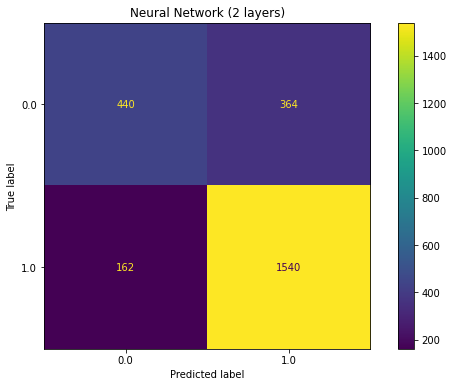

In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt

nn_clf.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Neural Network (2 layers)')

disp = metrics.plot_confusion_matrix(nn_clf, X_test, y_test, ax=ax)
disp.confusion_matrix

79/79 [==============================] - 0s 3ms/step


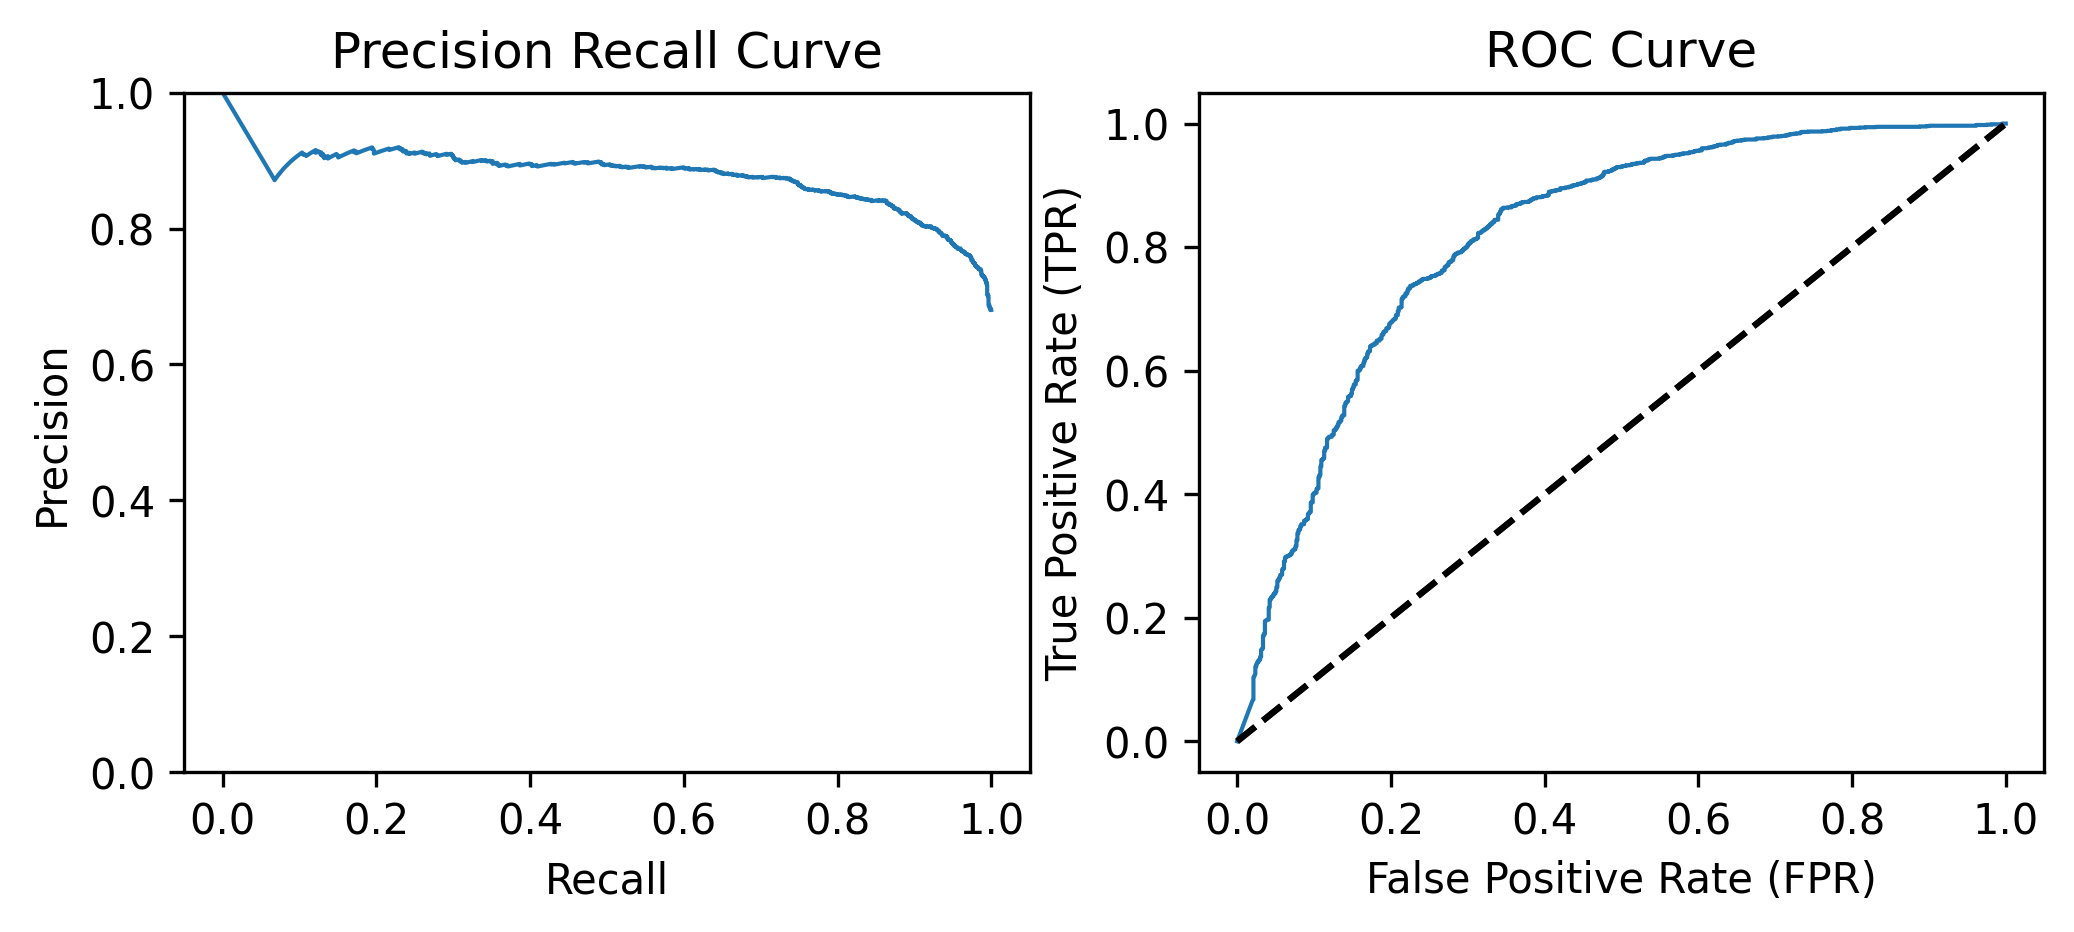

In [30]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = nn_clf.predict_proba(X_test)[:,1]
precision_nn, recall_nn, _ = precision_recall_curve(y_test, soft_pred)
fpr_nn, tpr_nn, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_nn, precision_nn, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_nn, tpr_nn, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

# Deep Neural Networks

In [31]:
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold, cross_validate
from scikeras.wrappers import KerasClassifier

dnn = keras.models.Sequential([
    keras.layers.Dense(1000, activation="elu", kernel_initializer='random_normal', input_shape=X_train[0].shape),
    keras.layers.Dense(500, activation="elu", kernel_initializer='random_normal'),
    keras.layers.Dense(250, activation="elu", kernel_initializer='random_normal'),
    keras.layers.Dense(50, activation="elu", kernel_initializer='random_normal'),
    keras.layers.Dense(10, activation="elu", kernel_initializer='random_normal'),
    keras.layers.Dense(1, activation="sigmoid")
])
dnn.summary()
dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
dnn_clf = KerasClassifier(dnn, epochs=7)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_dnn_clf = cross_validate(dnn_clf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'], cv=cv)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              2026000   
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dense_5 (Dense)             (None, 250)               125250    
                                                                 
 dense_6 (Dense)             (None, 50)                12550     
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,664,821
Trainable params: 2,664,821
No

In [32]:
print(f"Accuracy: {np.round(scores_dnn_clf['test_accuracy'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_accuracy'])*100, 2)}%")
print(f"Recall: {np.round(scores_dnn_clf['test_recall'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_recall'])*100, 2)}%")
print(f"Precision: {np.round(scores_dnn_clf['test_precision'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_precision'])*100, 2)}%")
print(f"F1 Score: {np.round(scores_dnn_clf['test_f1'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_f1'])*100, 2)}%")
print(f"ROC AUC: {np.round(scores_dnn_clf['test_roc_auc'], 4)}. Average is {np.round(np.mean(scores_dnn_clf['test_roc_auc'])*100, 2)}%")

Accuracy: [0.8136 0.8006 0.7745 0.7764 0.7884 0.7854 0.7964 0.7874 0.7695 0.8114]. Average is 79.04%
Recall: [0.9102 0.9175 0.8277 0.8557 0.8689 0.8247 0.8895 0.8704 0.8645 0.9233]. Average is 87.52%
Precision: [0.8306 0.8123 0.8376 0.8218 0.8275 0.8537 0.824  0.8254 0.8085 0.8204]. Average is 82.62%
F1 Score: [0.8686 0.8617 0.8326 0.8384 0.8477 0.839  0.8555 0.8473 0.8356 0.8688]. Average is 84.95%
ROC AUC: [0.8287 0.8181 0.8083 0.8044 0.8438 0.8259 0.836  0.7986 0.7805 0.814 ]. Average is 81.58%


Epoch 1/7
314/314 [==============================] - 7s 20ms/step - loss: 0.4885 - accuracy: 0.7840
Epoch 2/7
314/314 [==============================] - 6s 20ms/step - loss: 0.4636 - accuracy: 0.7965
Epoch 3/7
314/314 [==============================] - 6s 20ms/step - loss: 0.4460 - accuracy: 0.8105
Epoch 4/7
314/314 [==============================] - 6s 19ms/step - loss: 0.4339 - accuracy: 0.8161
Epoch 5/7
314/314 [==============================] - 6s 19ms/step - loss: 0.4220 - accuracy: 0.8179
Epoch 6/7
314/314 [==============================] - 6s 19ms/step - loss: 0.4103 - accuracy: 0.8259
Epoch 7/7
13/79 [===>..........................] - ETA: 0s

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


79/79 [==============================] - 0s 4ms/step


array([[ 530,  274],
       [ 242, 1460]])

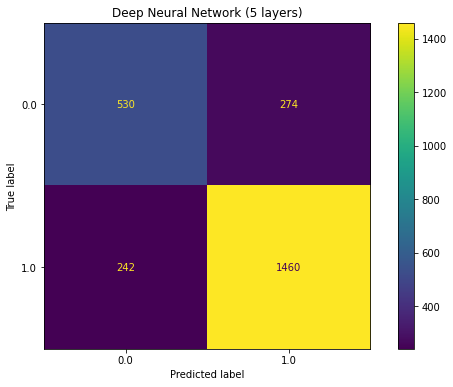

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt

dnn_clf.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Deep Neural Network (5 layers)')

disp = metrics.plot_confusion_matrix(dnn_clf, X_test, y_test, ax=ax)
disp.confusion_matrix

79/79 [==============================] - 0s 4ms/step


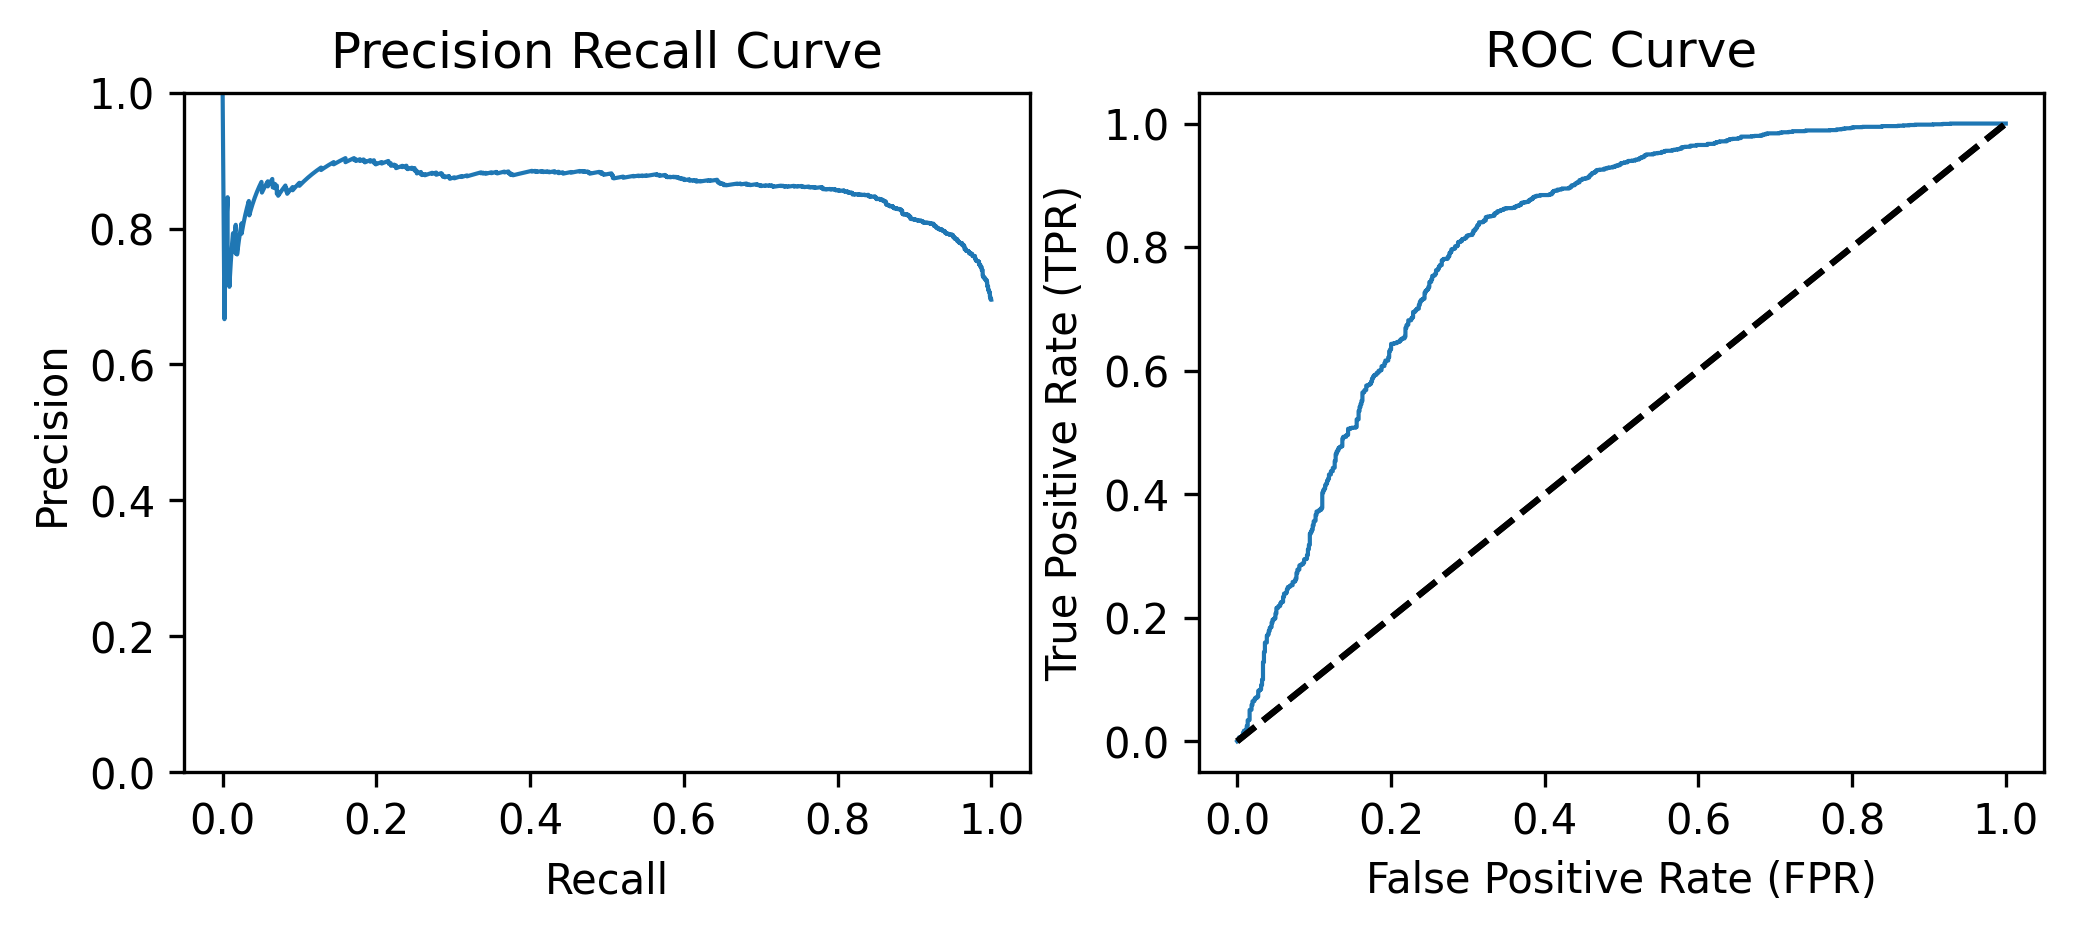

In [34]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3), dpi=300)
soft_pred = dnn_clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, soft_pred)
fpr, tpr, thresholds = roc_curve(y_test, soft_pred)

# plotting
precision_dnn, recall_dnn, _ = precision_recall_curve(y_test, soft_pred)
fpr_dnn, tpr_dnn, _ = roc_curve(y_test, soft_pred)

# plotting
plt.subplot(1,2,1)
plt.plot(recall_dnn, precision_dnn, linewidth=1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim(0,1)
plt.title('Precision Recall Curve')
plt.subplot(1,2,2)
plt.plot(fpr_dnn, tpr_dnn, linewidth=1)
plt.plot([(0,0),(1,1)], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

plt.show()

In [53]:
import numpy as np
final_scores = {}
scores = ['scores_log', 'scores_rbf', 'scores_poly', 'scores_tree', 'scores_forest', 'scores_nn', 'scores_dnn']
metrics = ['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_recall', 'test_precision', 'test_roc_auc']
for i in scores:
    final_scores[i] = []
    for j in metrics:
        val = globals()[i][j]
        final_scores[i].append(val)

final_scores

KeyError: 'scores_nn'

In [54]:
i = 'scores_log'

In [55]:
j = 'fit_time'

In [56]:
globals()[i][j]

array([16.62206697, 17.67801714, 17.04246593, 17.23271179, 17.08771491,
       18.02116513, 18.53738713, 16.96493506, 18.36500621, 18.55490804])